In [1]:
# 데이터 가져오기
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/gdrive/')
#https://arxiv.org/abs/2009.12042 => 하이퍼파라미터 최적화 논문
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%tensorflow_version 1.5.0
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# One_Class Support Vector Machine , AutoEncoder, Isololation Forest 

path = "/content/gdrive/Shareddrives/DACON_fds/source/fds/"
# 샘플 결과 저장 
submission_path = "/content/gdrive/Shareddrives/DACON_fds/code/박현우/DAGMM/"

train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path +"test.csv")
val = pd.read_csv(path +"val.csv")
train.drop(columns={"ID"},inplace=True)
val.drop(columns={"ID"},inplace=True)


Mounted at /content/gdrive/
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5.0`. This will be interpreted as: `1.x`.


After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow 1.x selected.


In [2]:
% cd gdrive/Shareddrives/DACON_fds/code/박현우/DAGMM 

/content/gdrive/Shareddrives/DACON_fds/code/박현우/DAGMM


In [3]:
from dagmm import DAGMM

In [4]:
scaler = MinMaxScaler()
scaler.fit(train)
scale_train = scaler.transform(train)
scale_val = scaler.transform(val[val.columns[:-1]])

In [ ]:
# Initialize
# comp hiddens : [30,15] , epoch_size = 400 일때 0.72
# comp hiddens : [30,20,10] 일때 
# comp hiddens : [30,10] 일떄 0.77 정확도
# comp hiddens : [10] 일때 정확도 0.52
from sklearn.metrics import roc_auc_score
epochs = [10,30,50,70,90,100,120,140,150,180,200,230,250,270,300]
acc = []
for epoch in epochs:
  model = DAGMM(
      comp_hiddens=[30,10], comp_activation=tf.nn.tanh,
      est_hiddens=[10,4,2,1], est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=epoch, minibatch_size=1024)
  # Fit the training data to model
  model.fit(scale_train)
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  anomaly_energy_threshold = np.percentile(energy, 99.83)

  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  acc.append(roc_auc_score(val['Class'],val['pred_class']))


KeyboardInterrupt: ignored

In [ ]:
plt.plot(epoch,acc,color = 'r', market = "o")
plt.xlabel("epoch")
plt.ylabel("AUROC")
plt.show()

In [ ]:
# Initialize
# comp hiddens : [30,15] , epoch_size = 400 일때 0.72
# comp hiddens : [30,20,10] 일때 
# comp hiddens : [30,10] 일떄 0.77 정확도
# comp hiddens : [10] 일때 정확도 0.52
from sklearn.metrics import roc_auc_score
minibatchs = [256,512,1024,2048,4096]
acc = []
for minibatch in minibatchs:
  model = DAGMM(
      comp_hiddens=[30,10], comp_activation=tf.nn.tanh,
      est_hiddens=[10,4,2,1], est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=140, minibatch_size=minibatch)
  # Fit the training data to model
  model.fit(scale_train)
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  anomaly_energy_threshold = np.percentile(energy, 99.83)

  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  acc.append(roc_auc_score(val['Class'],val['pred_class']))


In [ ]:
plt.plot(minibatchs,acc,color = 'r', marker = "o")
plt.xlabel("minibatch")
plt.ylabel("AUROC")
plt.show()

In [ ]:
acc

In [ ]:
# Initialize
# comp hiddens : [30,15] , epoch_size = 400 일때 0.72
# comp hiddens : [30,20,10] 일때 
# comp hiddens : [30,10] 일떄 0.77 정확도
# comp hiddens : [10] 일때 정확도 0.52
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

comp_hiddens = [[20,10],[30,20],[30,10],[40,25],[30,25]
# [0.8828761020446445,0.9162446070155693,0.9162446070155693,0.8328233445882574,0.9162446070155693] AUROC
# [0.5822784810126582,0.6329113924050633,0.6329113924050633,0.5063291139240507,0.6329113924050633] f1_Score
          
acc = []
f1 = []
for comp_hidden in comp_hiddens:
  model = DAGMM(
      comp_hiddens= comp_hidden, comp_activation=tf.nn.tanh,
      est_hiddens=[2,1], est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=50, minibatch_size=128)
  # Fit the training data to model
  model.fit(scale_train)
  print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  anomaly_energy_threshold = np.percentile(energy, 99.83)

  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  acc.append(roc_auc_score(val['Class'],val['pred_class']))
  f1.append(f1_score(val['pred_class'],val['Class']))

In [ ]:
#comp_hiddens 최적화 
# Initialize
# comp hiddens : [30,15] , epoch_size = 400 일때 0.72
# comp hiddens : [30,20,10] 일때 
# comp hiddens : [30,10] 일떄 0.77 정확도
# comp hiddens : [10] 일때 정확도 0.52
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

comp_hiddens = [[15],[30,10,5],[20,10],[20,10,5],[15,5]]
acc = []
f1 = []
for comp_hidden in comp_hiddens:
  model = DAGMM(
      comp_hiddens= comp_hidden, comp_activation=tf.nn.tanh,
      est_hiddens=[2,1], est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=50, minibatch_size=128)
  # Fit the training data to model
  model.fit(scale_train)
  print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  anomaly_energy_threshold = np.percentile(energy, 99.83)

  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  acc.append(roc_auc_score(val['Class'],val['pred_class']))
  f1.append(f1_score(val['pred_class'],val['Class']))

In [ ]:
print(acc)
print(f1)

In [ ]:
est_hiddens = [[15,5,1],[20,10,1],[16,8,1],[16,8,1],[10,1],[5,1],[2,1]]
acc = []
f1 = []
for est_hidden in est_hiddens:
  model = DAGMM(
      comp_hiddens= [15,5], comp_activation=tf.nn.tanh,
      est_hiddens= est_hidden , est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=50, minibatch_size=128)
  # Fit the training data to model
  model.fit(scale_train)
  print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  anomaly_energy_threshold = np.percentile(energy, 99.83)

  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  acc.append(roc_auc_score(val['Class'],val['pred_class']))
  f1.append(f1_score(val['pred_class'],val['Class']))

In [ ]:
print(est_hiddens)
print(acc)
print(f1)

In [ ]:
model = DAGMM(
      comp_hiddens= [15,5], comp_activation=tf.nn.tanh,
      est_hiddens= [5,1] , est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)



val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 

print(classification_report(val['pred_class'],val['Class']))

In [ ]:
print(roc_auc_score(val['Class'],val['pred_class']))
print(f1_score(val['pred_class'],val['Class']))

In [ ]:
anomaly_energy_threshold = np.percentile(energy, 99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))

In [ ]:
model = DAGMM(
      comp_hiddens= [15,5], comp_activation=tf.nn.relu,
      est_hiddens= [5,1] , est_dropout_ratio=0.5, est_activation=tf.nn.relu,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_energy_threshold = np.percentile(energy, 99.87)

val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 


In [ ]:
anomaly_energy_threshold = np.percentile(energy, 99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))

In [ ]:
model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [5,2] , est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_energy_threshold = np.percentile(energy, 99.87)

val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 

print(classification_report(val['pred_class'],val['Class']))

In [ ]:
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()

val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 

print(classification_report(val['pred_class'],val['Class']))

In [ ]:
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()

val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 

print(classification_report(val['pred_class'],val['Class']))

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)

val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 

print(classification_report(val['pred_class'],val['Class']))

In [ ]:
#comp_hiddens 최적화 
# Initialize
# comp hiddens : [30,15] , epoch_size = 400 일때 0.72
# comp hiddens : [30,20,10] 일때 
# comp hiddens : [30,10] 일떄 0.77 정확도
# comp hiddens : [10] 일때 정확도 0.52
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

comp_hiddens = [[30,10,5],[20,10],[20,10,5],[15,5]]
acc = []
f1 = []
for comp_hidden in comp_hiddens:
  model = DAGMM(
      comp_hiddens= comp_hidden, comp_activation=tf.nn.tanh,
      est_hiddens=[5,2], est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=50, minibatch_size=128)
  # Fit the training data to model
  model.fit(scale_train)
  print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  anomaly_energy_threshold = np.percentile(energy, 99.87)
  print("---------------------------------------------------------------------------")
  print(comp_hidden)
  print("99.87 percentile ")
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(val['pred_class'],val['Class']))
  print()
  print("ESD based threshold ")
  anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(val['pred_class'],val['Class']))
  print()
  print("anomaly ratio based VAL set")
  anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [5,2] , est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0002, epoch_size=150, minibatch_size=256)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print(comp_hidden)
print("99.87 percentile ")
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [5,2] , est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=64)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print(comp_hidden)
print("99.87 percentile ")
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [5,2] , est_dropout_ratio=0.1, est_activation=tf.nn.tanh,
      learning_rate=0.0002, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print(comp_hidden)
print("99.87 percentile ")
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,1], comp_activation = tf.nn.tanh,
      est_hiddens= [5,2] , est_dropout_ratio=0.1, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print(comp_hidden)
print("99.87 percentile ")
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,1], comp_activation = tf.nn.tanh,
      est_hiddens= [5,2] , est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=256)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print(comp_hidden)
print("99.87 percentile ")
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print(comp_hidden)
print("99.87 percentile ")
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")

print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,3], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,2], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [20,10], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [10], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")

print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,10], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")

print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,6], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")

print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [15,7], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")

print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [20,8], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")

print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [20,5], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")

print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
      comp_hiddens= [10,5], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=150, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")

print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))



In [ ]:
model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=140, minibatch_size=128)
    # Fit the training data to model
model.fit(scale_train)
print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

print("---------------------------------------------------------------------------")
print("99.87 percentile ")
anomaly_energy_threshold = np.percentile(val['predict'],99.87)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("ESD based threshold ")
anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))
print()
print("anomaly ratio based VAL set")
anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print(classification_report(val['pred_class'],val['Class']))


 epoch 100/140 : loss = 19.802
complete
---------------------------------------------------------------------------
99.87 percentile 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28425
           1       0.83      0.68      0.75        37

    accuracy                           1.00     28462
   macro avg       0.92      0.84      0.87     28462
weighted avg       1.00      1.00      1.00     28462


ESD based threshold 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28430
           1       0.83      0.78      0.81        32

    accuracy                           1.00     28462
   macro avg       0.92      0.89      0.90     28462
weighted avg       1.00      1.00      1.00     28462


anomaly ratio based VAL set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.83      0.81      0.82        3

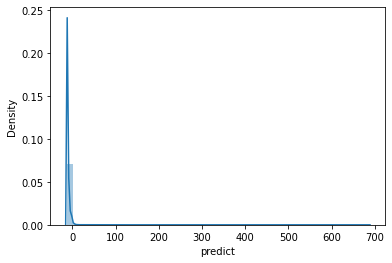

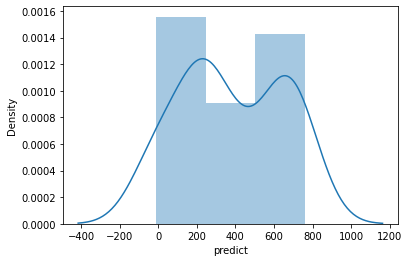

In [ ]:
normal = val[val['Class']==0]
abnormal = val[val['Class']==1]

sns.distplot(normal['predict'])
plt.show()
sns.distplot(abnormal['predict'])

In [ ]:
from sklearn.metrics import f1_score
f1_score(val['pred_class'],val['Class'],average="macro")

0.9097393418694286

In [ ]:
val['pred_class'] = val['predict'].apply(lambda x : 1 if x >= 199 else 0) 
print(classification_report(val['pred_class'],val['Class']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28434
           1       0.80      0.86      0.83        28

    accuracy                           1.00     28462
   macro avg       0.90      0.93      0.91     28462
weighted avg       1.00      1.00      1.00     28462



In [ ]:
f1_score(val['pred_class'],val['Class'],average="macro")

0.9137051774467988

In [ ]:
abnormal['predict']

71        -9.127126
641      208.160477
677      206.751617
836      695.352722
1196     756.379028
1201     758.999573
1547     742.188232
3055     474.615326
4039       5.435866
4267     627.047119
4396     644.381836
7702     316.666290
9326      -9.672611
12377    199.724396
12797    266.010956
13706    203.380203
14221    -11.617423
15027    663.970154
15029    653.765076
15030    653.765076
15054    643.093262
15345    665.880127
15425    459.437836
24110    193.980011
24358    388.429352
24742    255.865036
25042    304.952515
25504    216.593338
27998    229.783081
28146    -10.867412
Name: predict, dtype: float32

In [ ]:
ab = [71,4039,9326,14221,28146]
val.iloc[ab]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,Class,predict,pred_class
71,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.084469,-0.989438,1,-9.127126,0
4039,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,-2.042168,...,-0.597020,1.335954,0.547092,0.009979,0.160769,-0.293440,-0.521811,1,5.435866,0
9326,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,-0.194120,...,-0.026373,0.400300,0.072828,0.027043,0.063238,-0.307413,-0.236222,1,-9.672611,0
14221,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,...,0.114963,0.156365,-0.619437,-0.120351,0.035594,4.643750,0.001140,1,-11.617423,0
28146,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.450261,0.313267,-0.289617,0.002988,-0.015309,0.286872,1.006309,1,-10.867412,0


In [ ]:
abnormal

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,Class,predict,pred_class
71,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.084469,-0.989438,1,-9.127126,0
641,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,...,-0.219845,1.474753,0.491192,0.518868,0.402528,-0.293440,-0.906272,1,208.160477,1
677,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,-3.944238,...,-0.234649,-1.004881,0.435832,0.618324,0.148469,-0.293440,-0.899012,1,206.751617,1
836,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,-0.769348,-1.746337,0.502040,1.977258,0.711607,-0.293440,-0.864214,1,695.352722,1
1196,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,-13.002709,...,-1.047184,-0.035573,0.664900,2.122796,-1.416741,-0.293440,-0.749081,1,756.379028,1
1201,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,-12.916636,...,-1.051086,0.038009,0.672317,2.108471,-1.421243,-0.293440,-0.747730,1,758.999573,1
1547,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,-9.040396,...,0.095706,1.322751,-0.217955,1.628793,0.482248,1.089779,-0.683384,1,742.188232,1
3055,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,-6.600461,...,0.011007,0.080303,0.412191,0.635789,0.501050,-0.243695,-0.572916,1,474.615326,1
4039,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,-2.042168,...,-0.597020,1.335954,0.547092,0.009979,0.160769,-0.293440,-0.521811,1,5.435866,0
4267,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,-14.676470,...,0.763508,0.075456,-0.453840,-1.508968,-0.686836,-0.167819,-0.509628,1,627.047119,1


In [ ]:
val.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,Class,predict,pred_class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,...,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,-0.002299,...,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916,0.001054,-9.522967,0.000984
std,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,1.084560,...,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246,0.032449,16.727880,0.031350
min,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,-22.187089,...,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.000000,-12.800271,0.000000
25%,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,-0.540463,...,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884,0.000000,-11.899128,0.000000
50%,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,-0.099386,...,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156,0.000000,-11.168613,0.000000
75%,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,0.452763,...,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828,0.000000,-9.530246,0.000000
max,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,12.161890,...,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,1.000000,758.999573,1.000000


In [ ]:
np.percentile(energy,100- anomaly_ratio)

42.89938715460587

0.6894424211518999

In [ ]:
epochs = [10,20,50,80,120,150,180,200]
from sklearn.metrics import f1_score
f1 = []
for epoch in epochs:
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=epoch, minibatch_size=128)
    # Fit the training data to model
  model.fit(scale_train)
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  print("---------------------------------------------------------------------------")
  print(epoch)
  print("99.87 percentile ")
  anomaly_energy_threshold = np.percentile(val['predict'],99.87)
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(val['pred_class'],val['Class']))
  print()
  print("ESD based threshold ")
  anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(val['pred_class'],val['Class']))
  print()
  print("anomaly ratio based VAL set")
  anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(val['pred_class'],val['Class']))
  f1.append(f1_score(val['pred_class'],val['Class'],average = "macro"))

complete
---------------------------------------------------------------------------
10
99.87 percentile 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28425
           1       0.00      0.00      0.00        37

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462


ESD based threshold 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     28025
           1       0.40      0.03      0.05       437

    accuracy                           0.98     28462
   macro avg       0.69      0.51      0.52     28462
weighted avg       0.98      0.98      0.98     28462


anomaly ratio based VAL set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        31

    accuracy             

In [ ]:
epochs = [10,20,50,80,120,150,180,200]
from sklearn.metrics import f1_score
minibatchs = [128,256,512,1024,2056]
batch_f1 = []
for batch in minibatchs:
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=batch)
    # Fit the training data to model
  model.fit(scale_train)
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  print("---------------------------------------------------------------------------")
  print(epoch)
  print("99.87 percentile ")
  anomaly_energy_threshold = np.percentile(val['predict'],99.87)
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(val['pred_class'],val['Class']))
  print()
  print("ESD based threshold ")
  anomaly_energy_threshold = val['predict'].mean() + 3*val['predict'].std()
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(val['pred_class'],val['Class']))
  print()
  print("anomaly ratio based VAL set")
  anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(val['pred_class'],val['Class']))
  batch_f1.append(f1_score(val['pred_class'],val['Class'],average = "macro"))

complete
---------------------------------------------------------------------------
200
99.87 percentile 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28425
           1       0.83      0.68      0.75        37

    accuracy                           1.00     28462
   macro avg       0.92      0.84      0.87     28462
weighted avg       1.00      1.00      1.00     28462


ESD based threshold 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28425
           1       0.83      0.68      0.75        37

    accuracy                           1.00     28462
   macro avg       0.92      0.84      0.87     28462
weighted avg       1.00      1.00      1.00     28462


anomaly ratio based VAL set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.83      0.81      0.82        31

    accuracy            

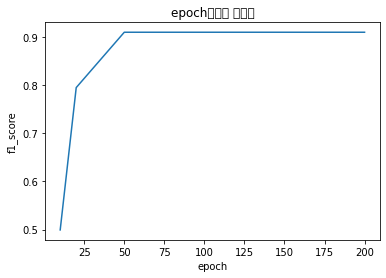

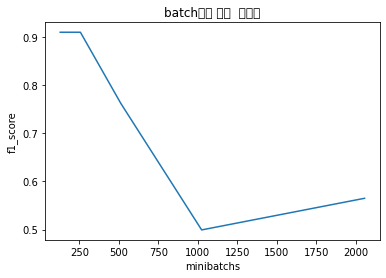

In [ ]:
plt.plot(epochs,f1)
plt.xlabel("epoch")
plt.ylabel("f1_score")
plt.title("epoch에따른 정확도")
plt.show()

plt.plot(minibatchs,batch_f1)
plt.xlabel("minibatchs")
plt.ylabel("f1_score")
plt.title("batch수에 따른  정확도")
plt.show()

In [ ]:
random_val = pd.DataFrame(columns = train.columns,data = scale_val)
random_train = pd.DataFrame(columns = train.columns,data = scale_train)
random_val['Class'] = val['Class']

In [ ]:
import random
from sklearn.metrics import f1_score
col_set = []
predict_set = pd.DataFrame()
random_f1 = []
a = 1

for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.13      0.13      0.13        31

    accuracy                           1.00     28462
   macro avg       0.57      0.56      0.57     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.23      0.23      0.23        31

    accuracy                           1.00     28462
   macro avg       0.62      0.61      0.61     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.23      0.23      0.23        31

    accuracy                           1.00     28462
   macro avg       0.62      0.61      0.61     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.43      0.42      0.43        31

    accuracy                           1.00     28462
   macro avg       0.72      0.71      0.71     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.30      0.29      0.30        31

    accuracy                           1.00     28462
   macro avg       0.65      0.64      0.65     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        31

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1


complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.20      0.19      0.20        31

    accuracy                           1.00     28462
   macro avg       0.60      0.60      0.60     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.10      0.10      0.10        31

    accuracy                           1.00     28462
   macro avg       0.55      0.55      0.55     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.20      0.19      0.20        31

    accuracy                           1.00     28462
   macro avg       0.60      0.60      0.60     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.10      0.10      0.10        31

    accuracy                           1.00     28462
   macro avg       0.55      0.55      0.55     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.30      0.29      0.30        31

    accuracy                           1.00     28462
   macro avg       0.65      0.64      0.65     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.70      0.68      0.69        31

    accuracy                           1.00     28462
   macro avg       0.85      0.84      0.84     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        31

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.23      0.23      0.23        31

    accuracy                           1.00     28462
   macro avg       0.62      0.61      0.61     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.47      0.45      0.46        31

    accuracy                           1.00     28462
   macro avg       0.73      0.73      0.73     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.37      0.35      0.36        31

    accuracy                           1.00     28462
   macro avg       0.68      0.68      0.68     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.27      0.26      0.26        31

    accuracy                           1.00     28462
   macro avg       0.63      0.63      0.63     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.10      0.10      0.10        31

    accuracy                           1.00     28462
   macro avg       0.55      0.55      0.55     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.50      0.48      0.49        31

    accuracy                           1.00     28462
   macro avg       0.75      0.74      0.75     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.33      0.32      0.33        31

    accuracy                           1.00     28462
   macro avg       0.67      0.66      0.66     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        31

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.13      0.13      0.13        31

    accuracy                           1.00     28462
   macro avg       0.57      0.56      0.57     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.23      0.23      0.23        31

    accuracy                           1.00     28462
   macro avg       0.62      0.61      0.61     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        31

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.13      0.13      0.13        31

    accuracy                           1.00     28462
   macro avg       0.57      0.56      0.57     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.03      0.03      0.03        31

    accuracy                           1.00     28462
   macro avg       0.52      0.52      0.52     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.20      0.19      0.20        31

    accuracy                           1.00     28462
   macro avg       0.60      0.60      0.60     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1
  

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.27      0.26      0.26        31

    accuracy                           1.00     28462
   macro avg       0.63      0.63      0.63     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        31

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.27      0.26      0.26        31

    accuracy                           1.00     28462
   macro avg       0.63      0.63      0.63     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1
  

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.13      0.13      0.13        31

    accuracy                           1.00     28462
   macro avg       0.57      0.56      0.57     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        31

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.23      0.23      0.23        31

    accuracy                           1.00     28462
   macro avg       0.62      0.61      0.61     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.27      0.26      0.26        31

    accuracy                           1.00     28462
   macro avg       0.63      0.63      0.63     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.07      0.06      0.07        31

    accuracy                           1.00     28462
   macro avg       0.53      0.53      0.53     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.17      0.16      0.16        31

    accuracy                           1.00     28462
   macro avg       0.58      0.58      0.58     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.17      0.16      0.16        31

    accuracy                           1.00     28462
   macro avg       0.58      0.58      0.58     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        31

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.13      0.13      0.13        31

    accuracy                           1.00     28462
   macro avg       0.57      0.56      0.57     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1
  

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.23      0.23      0.23        31

    accuracy                           1.00     28462
   macro avg       0.62      0.61      0.61     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.07      0.06      0.07        31

    accuracy                           1.00     28462
   macro avg       0.53      0.53      0.53     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.27      0.26      0.26        31

    accuracy                           1.00     28462
   macro avg       0.63      0.63      0.63     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1
  

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.43      0.42      0.43        31

    accuracy                           1.00     28462
   macro avg       0.72      0.71      0.71     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.23      0.23      0.23        31

    accuracy                           1.00     28462
   macro avg       0.62      0.61      0.61     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.30      0.29      0.30        31

    accuracy                           1.00     28462
   macro avg       0.65      0.64      0.65     28462
weighted avg       1.00      1.00      1.00    

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.17      0.16      0.16        31

    accuracy                           1.00     28462
   macro avg       0.58      0.58      0.58     28462
weighted avg       1.00      1.00      1.00     28462

complete
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.37      0.35      0.36        31

    accuracy                           1.00     28462
   macro avg       0.68      0.68      0.68     28462
weighted avg       1.00      1.00      1.00     28462



KeyboardInterrupt: ignored

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

In [ ]:
for i in range(10):
  random_col = random.sample(list(train.columns),20)
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [5,2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=0.0001, epoch_size=50, minibatch_size=128)
    # Fit the training data to model
  model.fit(random_train[random_col])
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)

  energy = model.predict(random_val[random_col])

  random_val['predict'] =  model.predict(random_val[random_col])


  anomaly_ratio = (len(random_val[random_val['Class']==1])/len(random_val[random_val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  random_val['pred_class'] = random_val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print(classification_report(random_val['pred_class'],random_val['Class']))
  col_set.append(random_col)
  random_f1.append(f1_score(random_val['pred_class'],random_val['Class'],average = "macro"))
  col_name = "predict"+ str(a)
  predict_set[col_name] = energy
  a = a+1

In [ ]:
score_table = pd.DataFrame()

In [ ]:
predict_set

,predict1,predict2,predict3,predict4,predict5,predict6,predict7,predict8,predict9,predict10,...,predict143,predict144,predict145,predict146,predict147,predict148,predict149,predict150,predict151,predict152
0,-12.057129,-10.447677,-8.817130,-9.940742,-11.161543,-10.289140,-13.461975,-11.420216,-11.363366,-10.395706,...,-10.364191,-7.733287,-11.461964,-8.539362,-12.589434,-10.472656,-11.383825,-10.708035,-11.660135,-7.325428
1,-9.284040,-8.163628,-10.689375,-9.177416,-10.424822,-6.776393,-11.448355,-8.059168,-7.068418,-7.166359,...,-10.243747,-8.470304,-6.535470,-7.608855,-6.172819,-9.060802,-1.655313,-5.062046,-11.411414,-9.310453
2,-10.572331,-9.747275,-10.450547,-6.631512,-12.147821,-13.136080,-12.769503,-9.402388,-9.990912,-10.379291,...,-9.609864,-10.329521,-8.922391,-10.689327,-12.874229,-10.083598,-4.939361,-10.867658,-10.883718,-11.174395
3,-8.971081,-9.454102,-10.696781,-9.745364,-7.574298,-8.234276,-10.671079,-4.669031,-9.136889,-4.464162,...,-8.178382,-6.752755,-2.465768,-5.772677,-2.539958,-8.772500,-1.869658,-7.479616,-11.067063,-8.057734
4,-2.153352,11.234912,-6.893112,-1.329945,-3.086080,6.083187,-1.940483,0.598177,-1.000744,0.825000,...,9.752503,-4.612780,-5.293523,0.606711,-8.971363,-0.032386,-0.847744,2.019432,-7.801353,-0.604277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-11.929584,-11.298321,-12.089849,-10.139368,-11.775148,-12.395847,-13.148920,-11.415055,-9.314445,-10.666695,...,-10.016111,-9.819263,-9.712410,-11.473375,-12.012990,-10.177925,-10.966189,-11.042510,-11.614522,-11.702682
28458,-10.936965,-10.749969,-12.665594,-10.093828,-11.176807,-12.342276,-12.652168,-10.891420,-10.500485,-8.978351,...,-10.790222,-7.441292,-11.423518,-11.485752,-12.087674,-11.001068,-10.734720,-10.444192,-11.988826,-10.878887
28459,-11.790280,-11.203968,-11.445451,-9.163046,-11.255436,-10.847439,-11.988033,-11.653877,-10.068052,-10.017396,...,-10.825441,-10.041255,-7.983111,-10.784076,-10.109975,-8.830794,-11.018872,-9.613480,-12.145287,-11.334696
28460,-11.296244,-11.607060,-12.370013,-8.369784,-8.171179,-13.171030,-13.529243,-12.141158,-6.527368,-9.046704,...,-7.112283,-10.332847,-12.013771,-7.231462,-13.276358,-10.606605,-9.145958,-10.399505,-8.563562,-10.738842


In [ ]:
score_table['score'] = random_f1
score_table['variable'] = col_set

In [ ]:
score_table.to_csv("/content/gdrive/MyDrive/Dacon_신용카드이상탐지대회/random_변수_score.csv")
predict_set.to_csv("/content/gdrive/MyDrive/Dacon_신용카드이상탐지대회/random_predict_value.csv")

In [5]:
ab = [71,4039,9326,14221,28146]

In [8]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,2], comp_activation = tf.nn.tanh,
      est_hiddens= [3] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.4994636230941034
-------------------------------------------------------
predict_value
71      -1.392990
4039    -4.472434
9326    -8.479523
14221   -6.381732
28146   -5.307439
Name: predict, dtype: float32
-------------------------------------------------------


In [9]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,3], comp_activation = tf.nn.tanh,
      est_hiddens= [3] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.6635739106042333
-------------------------------------------------------
predict_value
71      -4.104689
4039     2.405863
9326    -7.254950
14221   -7.687617
28146   -6.955091
Name: predict, dtype: float32
-------------------------------------------------------


In [10]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,4], comp_activation = tf.nn.tanh,
      est_hiddens= [4] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.7292180256082854
-------------------------------------------------------
predict_value
71       -0.678439
4039     11.739180
9326     -2.155766
14221    -5.697840
28146    -0.611340
Name: predict, dtype: float32
-------------------------------------------------------


In [11]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,2], comp_activation = tf.nn.tanh,
      est_hiddens= [4] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.4994636230941034
-------------------------------------------------------
predict_value
71      -3.938794
4039    -4.821194
9326    -7.904363
14221   -7.138817
28146   -4.915171
Name: predict, dtype: float32
-------------------------------------------------------


In [12]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [4] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.9097393418694286
-------------------------------------------------------
predict_value
71       -5.969689
4039     16.114576
9326     -5.167994
14221    -8.697345
28146    -7.747308
Name: predict, dtype: float32
-------------------------------------------------------


In [13]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.relu,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.relu,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.6471628818532205
-------------------------------------------------------
predict_value
71        1.933770
4039     18.885910
9326      5.575042
14221     0.461117
28146     8.403346
Name: predict, dtype: float32
-------------------------------------------------------


In [21]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.sigmoid,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.sigmoid,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.4994636230941034
-------------------------------------------------------
predict_value
71      -20.842497
4039    -16.441616
9326    -19.909891
14221   -18.965683
28146   -20.916933
Name: predict, dtype: float32
-------------------------------------------------------


In [22]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [5] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.9097393418694286
-------------------------------------------------------
predict_value
71       -6.272339
4039     13.345543
9326     -4.064307
14221    -8.836160
28146    -6.773979
Name: predict, dtype: float32
-------------------------------------------------------


In [23]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [6] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.8769172843674025
-------------------------------------------------------
predict_value
71      -4.778212
4039     8.488812
9326    -3.453973
14221   -8.892523
28146   -5.334643
Name: predict, dtype: float32
-------------------------------------------------------


In [24]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,6], comp_activation = tf.nn.tanh,
      est_hiddens= [6] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.6635739106042333
-------------------------------------------------------
predict_value
71       -8.448616
4039      6.888000
9326     -9.487917
14221   -10.841849
28146   -10.855659
Name: predict, dtype: float32
-------------------------------------------------------


In [25]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,7], comp_activation = tf.nn.tanh,
      est_hiddens= [7] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.5322856805961294
-------------------------------------------------------
predict_value
71       -6.584693
4039     -1.539735
9326    -12.158071
14221   -10.708896
28146   -12.704528
Name: predict, dtype: float32
-------------------------------------------------------


In [26]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,7], comp_activation = tf.nn.tanh,
      est_hiddens= [8] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.5651077380981554
-------------------------------------------------------
predict_value
71       -7.350649
4039      1.871997
9326    -11.569890
14221   -11.514234
28146   -12.090356
Name: predict, dtype: float32
-------------------------------------------------------


In [27]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,8], comp_activation = tf.nn.tanh,
      est_hiddens= [8] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.7948621406123374
-------------------------------------------------------
predict_value
71      -16.706984
4039     -9.198844
9326    -19.882254
14221   -20.364618
28146   -20.797533
Name: predict, dtype: float32
-------------------------------------------------------


In [28]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,8], comp_activation = tf.nn.tanh,
      est_hiddens= [9] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.7948621406123374
-------------------------------------------------------
predict_value
71      -16.260130
4039     -6.953600
9326    -20.441265
14221   -19.219717
28146   -20.552412
Name: predict, dtype: float32
-------------------------------------------------------


In [29]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,9], comp_activation = tf.nn.tanh,
      est_hiddens= [9] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.8605062556163894
-------------------------------------------------------
predict_value
71      -20.157515
4039     -6.556490
9326    -23.610649
14221   -23.891241
28146   -24.833513
Name: predict, dtype: float32
-------------------------------------------------------


In [30]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,9], comp_activation = tf.nn.tanh,
      est_hiddens= [10] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.8605062556163894
-------------------------------------------------------
predict_value
71      -21.245237
4039     -8.303342
9326    -28.969408
14221   -26.408674
28146   -28.440809
Name: predict, dtype: float32
-------------------------------------------------------


In [31]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,10], comp_activation = tf.nn.tanh,
      est_hiddens= [10] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.6963959681062595
-------------------------------------------------------
predict_value
71      -22.628643
4039     -4.534662
9326    -24.161573
14221   -25.340847
28146   -25.634455
Name: predict, dtype: float32
-------------------------------------------------------


In [32]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [16,10], comp_activation = tf.nn.tanh,
      est_hiddens= [10] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.7784511118613244
-------------------------------------------------------
predict_value
71      -17.848730
4039      7.897065
9326    -22.445131
14221   -22.036629
28146   -22.663172
Name: predict, dtype: float32
-------------------------------------------------------


In [33]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [17,10], comp_activation = tf.nn.tanh,
      est_hiddens= [10] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.5486967093471424
-------------------------------------------------------
predict_value
71      -18.162636
4039     -9.582451
9326    -22.290398
14221   -25.801577
28146   -21.078718
Name: predict, dtype: float32
-------------------------------------------------------


In [34]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [18,10], comp_activation = tf.nn.tanh,
      est_hiddens= [10] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.7456290543592985
-------------------------------------------------------
predict_value
71      -24.096392
4039    -12.425392
9326    -28.646643
14221   -28.539780
28146   -29.264053
Name: predict, dtype: float32
-------------------------------------------------------


In [35]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [19,10], comp_activation = tf.nn.tanh,
      est_hiddens= [10] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.5979297956001814
-------------------------------------------------------
predict_value
71      -12.025727
4039     -1.800703
9326    -23.016096
14221   -26.332378
28146   -21.489401
Name: predict, dtype: float32
-------------------------------------------------------


In [43]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [3] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.7620400831103115
-------------------------------------------------------
predict_value
71       -6.009821
4039      8.755840
9326     -5.715085
14221   -10.082111
28146    -8.227583
Name: predict, dtype: float32
-------------------------------------------------------


In [44]:
from sklearn.metrics import f1_score

model = DAGMM(
      comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
      est_hiddens= [2] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
      learning_rate=0.0001, epoch_size=70, minibatch_size=128)
  # Fit the training data to model
model.fit(scale_train)
print("complete")
  #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
  # Evaluate energies
  # (the more the energy is, the more it is anomary)
energy = model.predict(scale_val)

val['predict'] =  model.predict(scale_val)

anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
print("f1_Score")
print(f1_score(val['pred_class'],val['Class'],average = 'macro'))
print("-------------------------------------------------------")
print("predict_value")
print(val.loc[ab]['predict'])
print("-------------------------------------------------------")

complete
f1_Score
0.9097393418694286
-------------------------------------------------------
predict_value
71       -5.942832
4039      6.942770
9326     -7.073150
14221   -10.023865
28146    -8.559747
Name: predict, dtype: float32
-------------------------------------------------------


In [47]:
from sklearn.metrics import f1_score

learning_set = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
acc = []
for rate in learning_set:
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [4] , est_dropout_ratio=0.8, est_activation=tf.nn.tanh,
        learning_rate=rate, epoch_size=70, minibatch_size=128)
    # Fit the training data to model
  model.fit(scale_train)
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)
  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print("learning_rate")
  print(rate)
  print("-------------------------------------------------------")
  print("predict_value")
  print(val.loc[ab]['predict'])
  print("-------------------------------------------------------")
  acc.append(f1_score(val['pred_class'],val['Class'],average = 'macro'))

complete
learning_rate
0.001
-------------------------------------------------------
predict_value
71      -10.072180
4039      2.188332
9326    -10.844518
14221   -13.236038
28146    -4.856316
Name: predict, dtype: float32
-------------------------------------------------------
complete
learning_rate
0.002
-------------------------------------------------------
predict_value
71      -14.076516
4039     -0.669533
9326    -10.498946
14221   -17.006315
28146    -7.454426
Name: predict, dtype: float32
-------------------------------------------------------
complete
learning_rate
0.003
-------------------------------------------------------
predict_value
71      -11.731909
4039     -3.312493
9326    -12.784237
14221   -18.290421
28146   -10.590691
Name: predict, dtype: float32
-------------------------------------------------------
complete
learning_rate
0.004
-------------------------------------------------------
predict_value
71       -7.402408
4039      2.004862
9326     -9.577138
1422

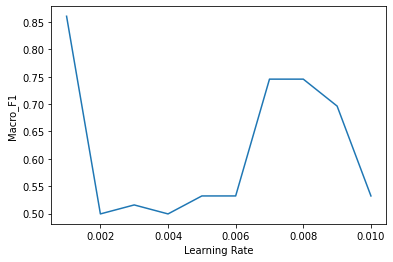

In [48]:
plt.plot(learning_set, acc)
plt.xlabel("Learning Rate")
plt.ylabel("Macro_F1")
plt.show()

In [50]:
from sklearn.metrics import f1_score

dropout_set = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
drop_acc = []
for rate in dropout_set:
  model = DAGMM(
        comp_hiddens= [15,5], comp_activation = tf.nn.tanh,
        est_hiddens= [4] , est_dropout_ratio=rate, est_activation=tf.nn.tanh,
        learning_rate=0.001, epoch_size=70, minibatch_size=128)
    # Fit the training data to model
  model.fit(scale_train)
  print("complete")
    #comp_hiddens , est_hiddens, minibatch_size , epoch_size, learning_rate 최적화 시켜야합니다
    # Evaluate energies
    # (the more the energy is, the more it is anomary)
  energy = model.predict(scale_val)

  val['predict'] =  model.predict(scale_val)

  anomaly_ratio = (len(val[val['Class']==1])/len(val[val['Class']==0]))*100
  anomaly_energy_threshold = np.percentile(energy,100- anomaly_ratio)
  val['pred_class'] = val['predict'].apply(lambda x : 1 if x > anomaly_energy_threshold else 0) 
  print("dropout_rate")
  print(rate)
  print("-------------------------------------------------------")
  print("predict_value")
  print(val.loc[ab]['predict'])
  print("-------------------------------------------------------")
  drop_acc.append(f1_score(val['pred_class'],val['Class'],average = 'macro'))

complete
dropout_rate
0.1
-------------------------------------------------------
predict_value
71      -10.859922
4039      2.573393
9326    -10.476220
14221   -13.468270
28146    -4.679704
Name: predict, dtype: float32
-------------------------------------------------------
complete
dropout_rate
0.2
-------------------------------------------------------
predict_value
71      -10.740897
4039      2.693845
9326    -10.773660
14221   -13.394672
28146    -5.312827
Name: predict, dtype: float32
-------------------------------------------------------
complete
dropout_rate
0.3
-------------------------------------------------------
predict_value
71      -10.982957
4039      1.334897
9326    -11.923631
14221   -13.358792
28146    -6.004388
Name: predict, dtype: float32
-------------------------------------------------------
complete
dropout_rate
0.4
-------------------------------------------------------
predict_value
71       -9.922798
4039      0.200630
9326    -10.801618
14221   -13.1417

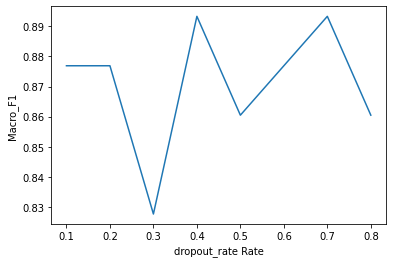

In [51]:
plt.plot(dropout_set, drop_acc)
plt.xlabel("dropout_rate Rate")
plt.ylabel("Macro_F1")
plt.show()

In [53]:
print(dropout_set)
print(drop_acc)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
[0.8769172843674025, 0.8769172843674025, 0.8276841981143634, 0.8933283131184154, 0.8605062556163894, 0.8769172843674025, 0.8933283131184154, 0.8605062556163894]
